In [4]:
!pip install fastai

Defaulting to user installation because normal site-packages is not writeable
  Using cached fastai-2.7.13-py3-none-any.whl (232 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 KB 490.0 kB/s eta 0:00:00a 0:00:01
  Using cached spacy-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 KB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 KB 10.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 KB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━

In [1]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
2023-12-23 18:28:12.876507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 18:28:12.876559: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 18:28:12.972663: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 18:28:13.173396: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU 

In [6]:
a = '../imgs_zip/imgs/train/'
path = Path(a)
path.ls()
np.random.seed(40)
item_tfms = [Resize(224)]
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                   size=224,
                                  item_tfms=item_tfms)

/home/sanarip03/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [4]:
learn = cnn_learner(data, models.resnet18, model_dir='./model', path = Path("."))

/home/dan/.local/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/dan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images wit

SuggestedLRs(valley=0.0010000000474974513)

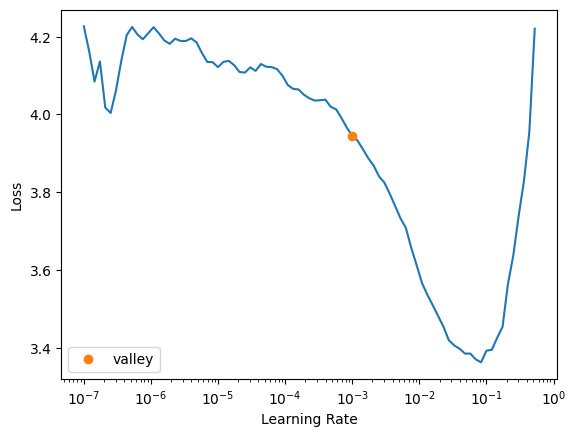

In [5]:
learn.lr_find()

In [6]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(50,slice(lr1,lr2))

/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images wit

In [7]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images wit

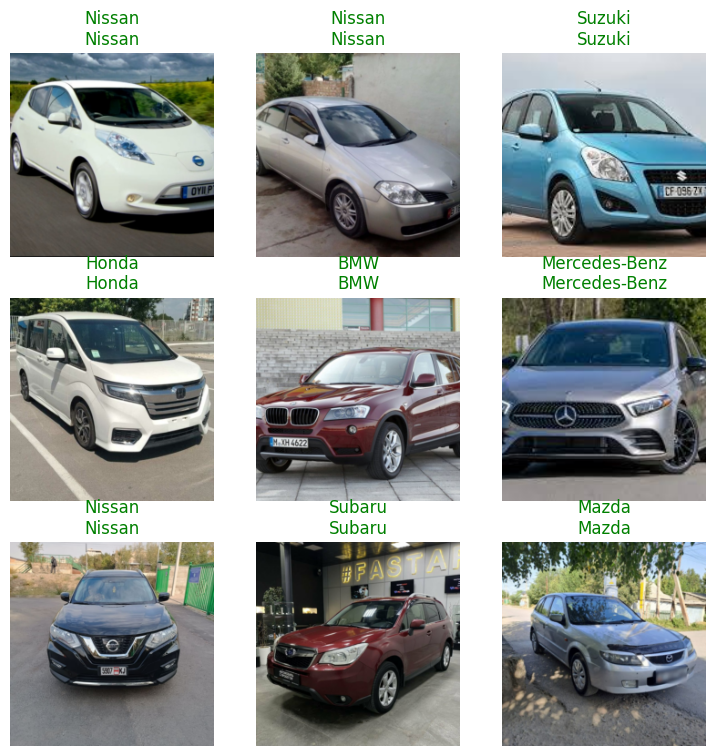

In [8]:
learn.show_results()

/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/dan/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


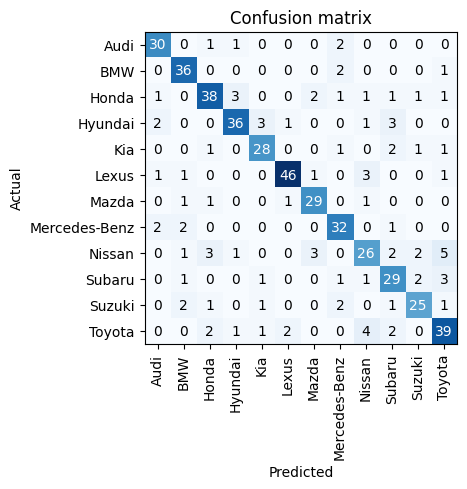

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
# Counting the values of losses
interp.top_losses(largest=True)

(TensorBase([1.1305e+01, 8.5926e+00, 7.3163e+00, 6.8791e+00, 6.7531e+00,
             5.9732e+00, 5.9729e+00, 5.8387e+00, 5.8037e+00, 5.7299e+00,
             5.5395e+00, 5.4350e+00, 5.3161e+00, 5.2842e+00, 5.2234e+00,
             4.8137e+00, 4.7314e+00, 4.6495e+00, 4.6431e+00, 4.6309e+00,
             4.4154e+00, 4.3410e+00, 4.3053e+00, 4.1339e+00, 4.1275e+00,
             3.9060e+00, 3.8865e+00, 3.8551e+00, 3.8529e+00, 3.8360e+00,
             3.6970e+00, 3.6944e+00, 3.5573e+00, 3.4874e+00, 3.4172e+00,
             3.3102e+00, 3.2986e+00, 3.2848e+00, 3.2734e+00, 3.1587e+00,
             2.9445e+00, 2.9177e+00, 2.8592e+00, 2.6909e+00, 2.6623e+00,
             2.6538e+00, 2.5746e+00, 2.5069e+00, 2.4013e+00, 2.3848e+00,
             2.3707e+00, 2.3519e+00, 2.3179e+00, 2.1517e+00, 2.1466e+00,
             2.1102e+00, 2.1087e+00, 2.0610e+00, 2.0549e+00, 2.0467e+00,
             1.9902e+00, 1.9555e+00, 1.9086e+00, 1.8786e+00, 1.8562e+00,
             1.8053e+00, 1.7236e+00, 1.7154e+00, 1.

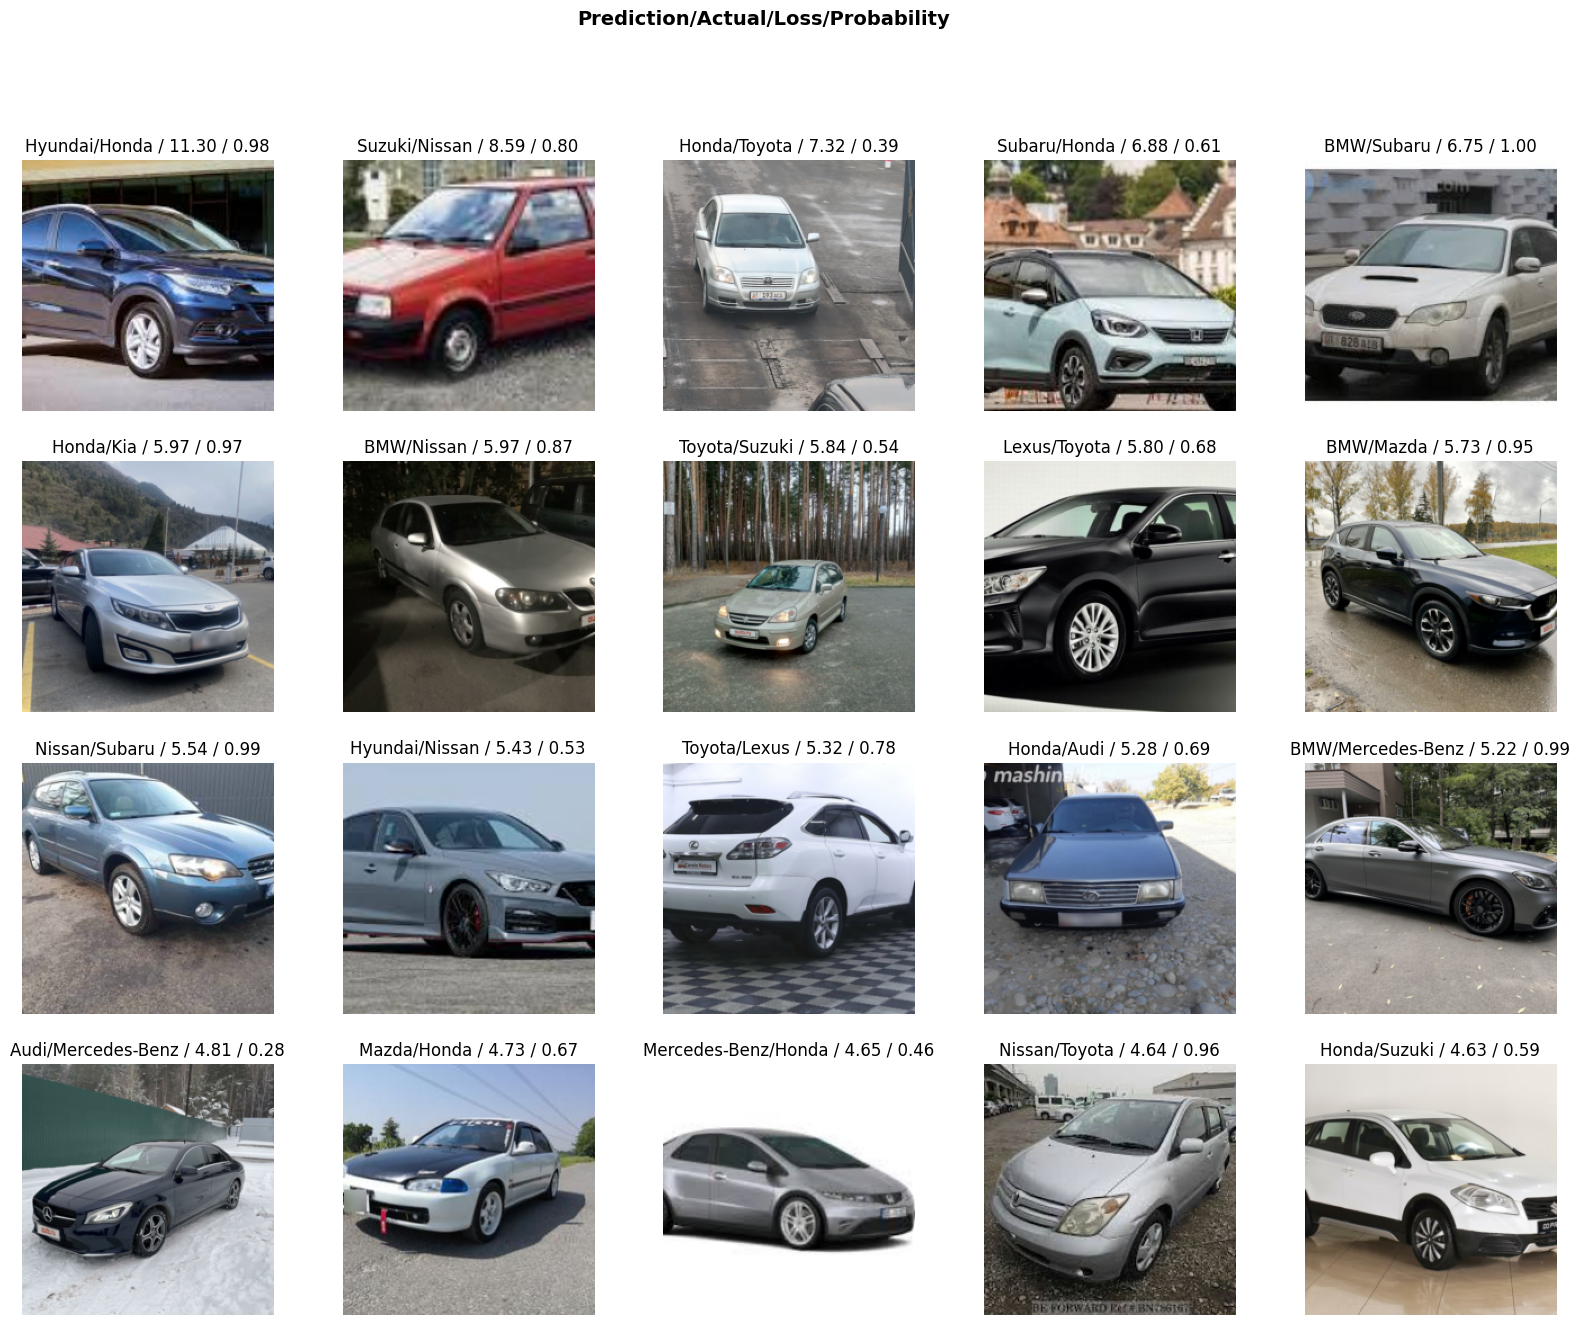

In [11]:
# Comparing the predicted and actual output
interp.plot_top_losses(20,figsize = (20,15))

In [12]:
im = Image.open('test_imgs/3806a8a081f7d8169314ec9539098262_640x480.jpg')
im_t = cast(array(im), TensorImage)

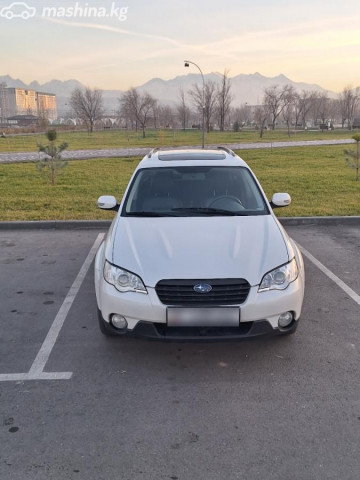

In [13]:
im

In [14]:
im_t #showing image tensor

TensorImage([[[204, 213, 222],
              [203, 212, 221],
              [202, 211, 220],
              ...,
              [241, 237, 236],
              [241, 237, 236],
              [241, 237, 236]],

             [[207, 216, 225],
              [206, 215, 224],
              [206, 215, 224],
              ...,
              [241, 237, 236],
              [241, 237, 236],
              [241, 237, 236]],

             [[208, 217, 224],
              [209, 218, 225],
              [208, 217, 224],
              ...,
              [241, 237, 234],
              [242, 238, 237],
              [242, 238, 237]],

             ...,

             [[105, 108, 117],
              [105, 108, 117],
              [104, 107, 116],
              ...,
              [119, 118, 124],
              [116, 115, 121],
              [107, 106, 112]],

             [[109, 112, 121],
              [108, 111, 120],
              [106, 109, 118],
              ...,
              [113, 112, 118],
          

In [15]:
learn.export(Path("export.pkl"))
learn.model_dir = ""
learn.save("stage-1_v2")
learn = load_learner('export.pkl')

Predicted label: Kia, probability: 0.8333


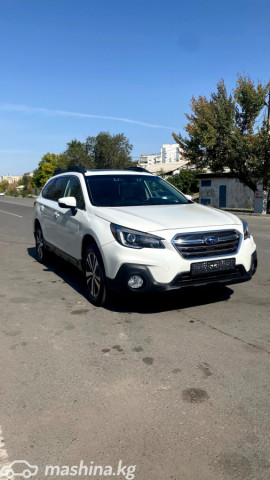

In [16]:
from PIL import Image
img = Image.open('test_imgs/83d2b827039e8604071b1fa5e9c69362_640x480.jpg')

# Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)
im_t = cast(array(img_resized), TensorImage)
# Print the predicted label and probability
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")
img

Predicted label: silver, probability: 0.9920


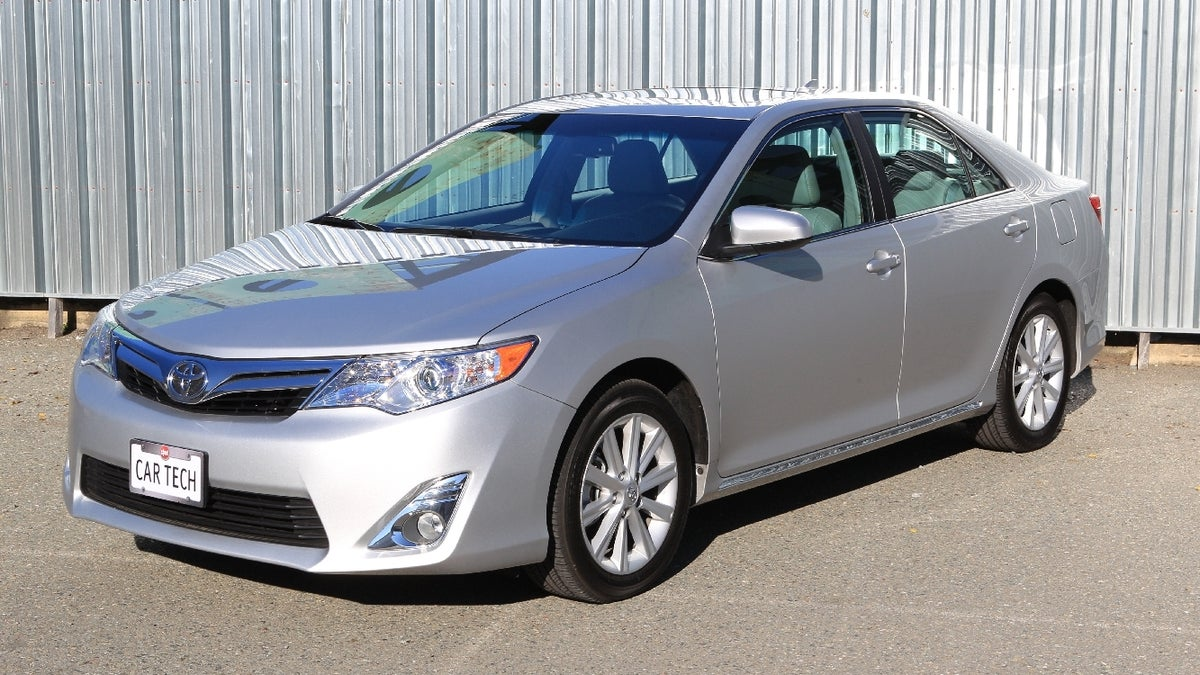

In [22]:
img = Image.open('test_imgs/35090245_OVR.jpg') # Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")
img

In [2]:
from fastai.vision.all import *
from PIL import Image

In [3]:
data = ImageDataLoaders.from_folder('../imgs_zip/imgs/train', train='.', valid_pct=0.2, 
                                   size=224, item_tfms=Resize(224))

/home/sanarip03/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [4]:
learn = cnn_learner(data, models.resnet18, model_dir='')

/home/sanarip03/.local/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [5]:
learn.export(Path("export.pkl"))
learn.model_dir = ""

In [6]:
learn = load_learner('export.pkl')

In [8]:
learn.load("stage-1_v2")

/home/sanarip03/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Predicted class: Honda
Predicted probabilities: 0.9777


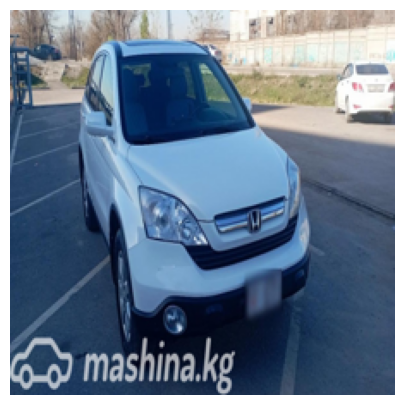

In [9]:
def predict_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Resize the image (if necessary)
    img_resized = img.resize((224, 224))

    # Predict
    pred_class, pred_idx, probs = learn.predict(img_resized)

    # Print results
    print(f"Predicted class: {pred_class}")
    print(f"Predicted probabilities: {probs[pred_idx]:.4f}")

    # Display the image
    img_resized.show()

# Example usage
predict_image('test_images/e30b8ff074b04f392dedbf49da9a8f28_640x480.jpg')